In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data into a pandas dataframe
biden_df = pd.read_csv('hashtag_joebiden.csv')

# Display dataframe
biden_df.head()



C:\Users\deolg\AppData\Local\Temp\ipykernel_36932\4196577522.py:2: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  biden_df = pd.read_csv('hashtag_joebiden.csv')


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.31652929585929e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,809904438.0,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3494182277.0,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.3165293080815575e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596012018524e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032806955356545e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [3]:
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059909 entries, 0 to 1059908
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   created_at            1059909 non-null  object 
 1   tweet_id              887173 non-null   object 
 2   tweet                 887173 non-null   object 
 3   likes                 887092 non-null   object 
 4   retweet_count         887073 non-null   float64
 5   source                886360 non-null   object 
 6   user_id               887067 non-null   object 
 7   user_name             887048 non-null   object 
 8   user_screen_name      786660 non-null   object 
 9   user_description      704647 non-null   object 
 10  user_join_date        776784 non-null   object 
 11  user_followers_count  776885 non-null   object 
 12  user_location         543063 non-null   object 
 13  lat                   355284 non-null   object 
 14  long                  355284 non-n

In [4]:
print(biden_df.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


tweet: Essential for sentiment analysis.

likes, retweet_count: Indicators of engagement and potential influence.

user_join_date, user_followers_count: Useful for identifying influential users.

user_location, lat, long, city, country, continent, state, state_code: For geographical analysis of sentiments.

In [5]:

# Drop unnecessary columns
columns_to_drop = ['tweet_id', 'source', 'user_id', 'user_name', 'user_screen_name', 'user_description', 'collected_at','continent','state_code']
biden_df.drop(columns=columns_to_drop, inplace=True, axis=1)

In [6]:
biden_df.head()

,created_at,tweet,likes,retweet_count,user_join_date,user_followers_count,user_location,lat,long,city,country,state
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,Florida
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,2012-09-08 01:03:57,6628.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,Montana
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,2017-01-25 14:16:17,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,California


In [7]:
# Convert 'likes', 'retweet_count', and 'user_followers_count' to numeric
biden_df['likes'] = pd.to_numeric(biden_df['likes'], errors='coerce')
biden_df['retweet_count'] = pd.to_numeric(biden_df['retweet_count'], errors='coerce')
biden_df['user_followers_count'] = pd.to_numeric(biden_df['user_followers_count'], errors='coerce')
# Convert 'user_join_date' to datetime
biden_df['user_join_date'] = pd.to_datetime(biden_df['user_join_date'], errors='coerce')


In [8]:
# Drop rows where 'tweet' is NaN
biden_df.dropna(subset=['tweet'], inplace=True)

In [9]:
# Drop rows with NaN values
biden_df = biden_df.dropna()

In [10]:
# Text Data Cleaning for Tweets
import re

def clean_tweet_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)     # Remove mentions
    text = re.sub(r'#\S+', '', text)     # Remove hashtags
    text = re.sub(r'[^a-z\s]', '', text) # Remove non-alphabetic characters
    return text

biden_df['cleaned_tweet'] = biden_df['tweet'].apply(clean_tweet_text)

In [11]:
# Drop rows that are not from the United States
biden_df =biden_df[biden_df['country'] == 'United States of America']



In [12]:
# Remove rows where 'tweet' is an empty string
biden_df = biden_df[biden_df['cleaned_tweet'].astype(str).str.strip() != '']

In [13]:
biden_df.head()

,created_at,tweet,likes,retweet_count,user_join_date,user_followers_count,user_location,lat,long,city,country,state,cleaned_tweet
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,2009-02-02 23:08:28,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,Illinois,in is being by twitter to manipulate a us ...
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,2010-01-04 04:34:39,83.0,"Tampa, Florida",27.94776,-82.458444,Tampa,United States of America,Florida,comments on this do democrats understand how r...
22,2020-10-15 00:01:47,Twitter is doing everything they can to help D...,1.0,0.0,2019-06-15 18:24:44,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,California,twitter is doing everything they can to help d...
29,2020-10-15 00:02:06,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0.0,0.0,2011-07-12 22:32:26,166.0,"New York, NY",40.712728,-74.006015,New York,United States of America,New York,come on please do the right thing move the t...
34,2020-10-15 00:02:23,#realDonaldTrump addresses #JoeBiden and #Hunt...,0.0,1.0,2015-08-29 13:25:25,411.0,"Minneapolis, MN",44.9773,-93.265469,Minneapolis,United States of America,Minnesota,addresses and corruption more proof of whic...


In [14]:
# Get info on the dataframe
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82085 entries, 6 to 1059888
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   created_at            82085 non-null  object        
 1   tweet                 82085 non-null  object        
 2   likes                 82085 non-null  float64       
 3   retweet_count         82085 non-null  float64       
 4   user_join_date        82085 non-null  datetime64[ns]
 5   user_followers_count  82085 non-null  float64       
 6   user_location         82085 non-null  object        
 7   lat                   82085 non-null  object        
 8   long                  82085 non-null  object        
 9   city                  82085 non-null  object        
 10  country               82085 non-null  object        
 11  state                 82085 non-null  object        
 12  cleaned_tweet         82085 non-null  object        
dtypes: datetime64[ns](1

In [15]:
# Install NLTK if you haven't
!pip install nltk

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\deolg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Use VADER to analyze the sentiment of each tweet. VADER gives a compound score which you can use to categorize the sentiment as positive, negative, or neutral.

VADER is particularly effective for social media text due to its understanding of informal language, emojis, and slangs.
The compound score thresholds (0.05 and -0.05) are standard starting points, but you can adjust them based on your specific requirements or after evaluating your results.

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to your DataFrame
biden_df['sentiment'] = biden_df['cleaned_tweet'].apply(get_vader_sentiment)

In [18]:
biden_df.head()

,created_at,tweet,likes,retweet_count,user_join_date,user_followers_count,user_location,lat,long,city,country,state,cleaned_tweet,sentiment
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,2009-02-02 23:08:28,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,Illinois,in is being by twitter to manipulate a us ...,negative
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,2010-01-04 04:34:39,83.0,"Tampa, Florida",27.94776,-82.458444,Tampa,United States of America,Florida,comments on this do democrats understand how r...,neutral
22,2020-10-15 00:01:47,Twitter is doing everything they can to help D...,1.0,0.0,2019-06-15 18:24:44,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,California,twitter is doing everything they can to help d...,positive
29,2020-10-15 00:02:06,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0.0,0.0,2011-07-12 22:32:26,166.0,"New York, NY",40.712728,-74.006015,New York,United States of America,New York,come on please do the right thing move the t...,positive
34,2020-10-15 00:02:23,#realDonaldTrump addresses #JoeBiden and #Hunt...,0.0,1.0,2015-08-29 13:25:25,411.0,"Minneapolis, MN",44.9773,-93.265469,Minneapolis,United States of America,Minnesota,addresses and corruption more proof of whic...,neutral


Analysis and Visualization: After labeling the sentiments, you can analyze the distribution of sentiments, or perform more detailed analyses like time-based sentiment trends, geographical sentiment distribution, etc.

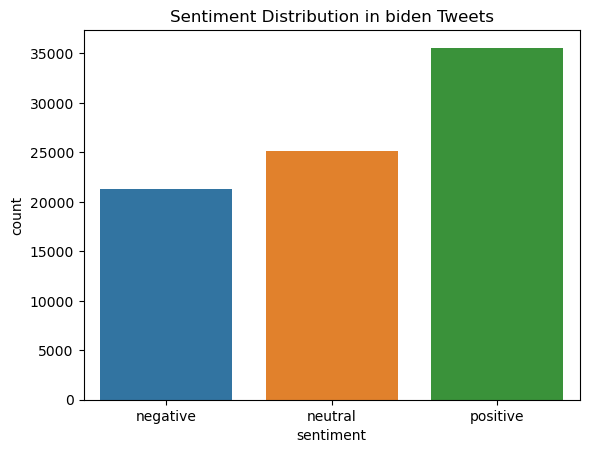

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of sentiment distribution
sns.countplot(x='sentiment', data=biden_df)
plt.title('Sentiment Distribution in biden Tweets')
plt.show()

 you can explore how the sentiments of the tweets correlate with other factors such as retweet count, likes, and user follower count. This kind of analysis can provide insights into the relationship between public engagement (likes, retweets) and the sentiment of the content.

# Correlation Analysis

start by examining the correlation between numerical features like likes, retweet_count, user_followers_count, and the sentiment of the tweets.

Convert Sentiment to Numerical for Correlation
First, you'll need to convert the sentiment labels to a numerical format for correlation analysis:

In [20]:
# Assign numerical values to sentiments (e.g., positive: 1, neutral: 0, negative: -1)
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
biden_df['sentiment_numeric'] = biden_df['sentiment'].map(sentiment_mapping)

# Calculate Correlation

In [21]:
# Selecting relevant columns for correlation
columns_for_correlation = ['likes', 'retweet_count', 'user_followers_count', 'sentiment_numeric']
correlation_matrix = biden_df[columns_for_correlation].corr()

# Display the correlation matrix
print(correlation_matrix)

                         likes  retweet_count  user_followers_count  \
likes                 1.000000       0.894511              0.186905   
retweet_count         0.894511       1.000000              0.221776   
user_followers_count  0.186905       0.221776              1.000000   
sentiment_numeric     0.001543      -0.002678             -0.013972   

                      sentiment_numeric  
likes                          0.001543  
retweet_count                 -0.002678  
user_followers_count          -0.013972  
sentiment_numeric              1.000000  


# Visualization of Correlations

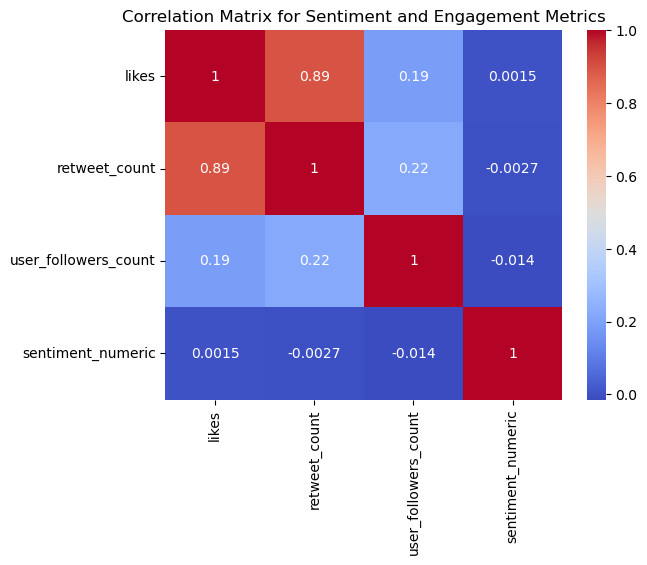

In [22]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Sentiment and Engagement Metrics')
plt.show()

Advanced Insights
High Engagement Tweets: Analyze tweets with high likes or retweets to see if they are more likely to be positive or negative.
Influential Users: Check if users with a high follower count tend to post tweets with a certain sentiment.
Temporal Analysis: Look at how sentiment might vary over time and correlate with specific events or dates.

# Regression Analysis

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Preparing data for regression analysis
X = biden_df[['likes', 'retweet_count', 'user_followers_count']]
y = biden_df['sentiment_numeric']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
# Evaluate the model using appropriate metrics like R-squared, MSE, etc.


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"R-squared Score: {R2}")

Mean Absolute Error: 0.7124539469619589
Mean Squared Error: 0.6574654976488846
R-squared Score: -0.00025614542568841436


 R² score is extremely low, which implies that the model is not capturing the underlying pattern between the features ('likes', 'retweet_count', 'user_followers_count') and the sentiment score effectively.

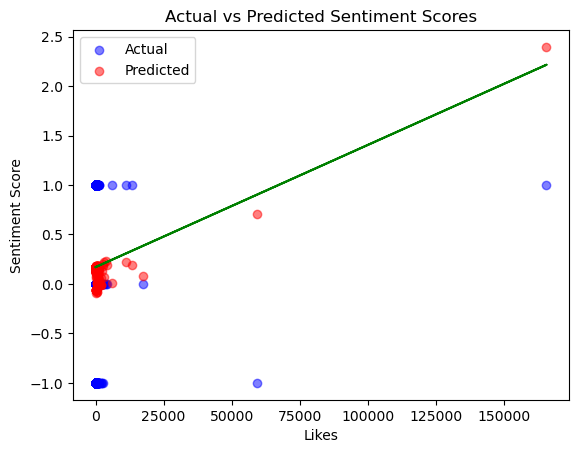

In [25]:
import matplotlib.pyplot as plt
import numpy as np


# Scatter plot of actual vs predicted values
plt.scatter(X_test['likes'], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test['likes'], y_pred, color='red', label='Predicted', alpha=0.5)

# Line of best fit
m, b = np.polyfit(X_test['likes'], y_pred, 1)
plt.plot(X_test['likes'], m*X_test['likes'] + b, color='green')

plt.xlabel('Likes')
plt.ylabel('Sentiment Score')
plt.title('Actual vs Predicted Sentiment Scores')
plt.legend()
plt.show()

Multiple Independent Variables: If your model uses multiple independent variables (like likes, retweets, and followers count), the visualization becomes more complex. In such cases, consider plotting separate graphs for each variable against the sentiment score, or use techniques like partial regression plots.

If you're using a different independent variable (like retweet_count or user_followers_count), adjust the X_test column in the scatter plot accordingly.

In [26]:
!pip install wordcloud


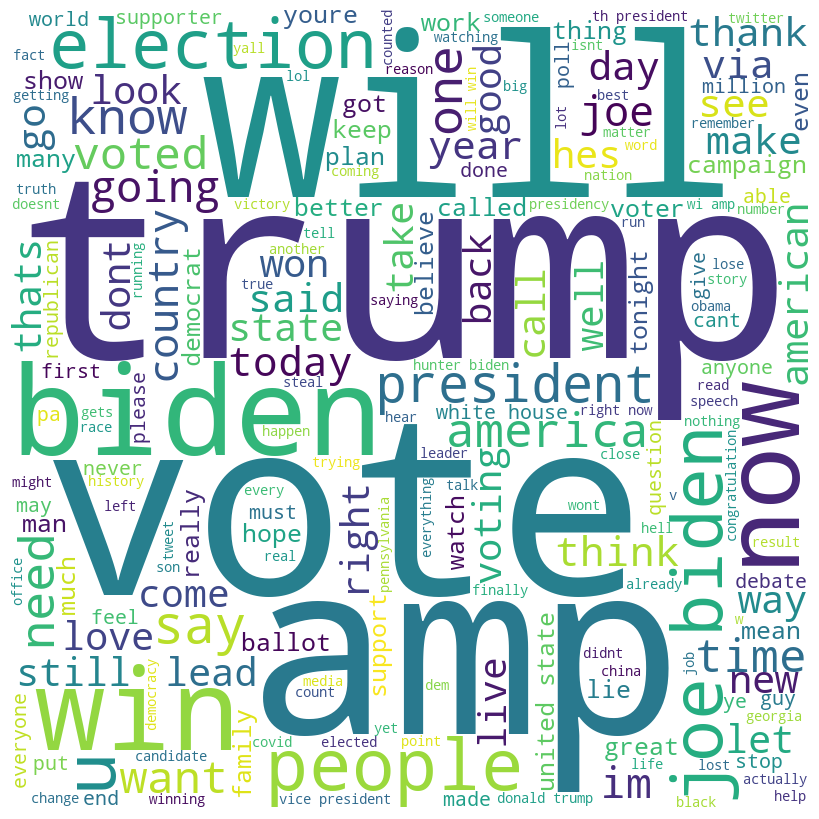

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example for Biden's tweets
text = ' '.join(biden_df['cleaned_tweet'])  # Assuming 'cleaned_tweet' is your column name
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(text)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [28]:

biden_df.to_csv('biden_tweets_sentiment.csv', index=False)
